# Leitura da base + Informações

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/raw/ecom_product_data.csv")

# 1. Visão geral
print(df.info())
print("==" * 40)
print(df.describe())
print("==" * 40)

# 2. Missing values
print("Valores nulos: ", df.isna().sum())
print("==" * 40)
print("Valores nulos p/col: ", df.isna().mean().sort_values(ascending=False))
print("==" * 40)

# 3. Informações gerais
print("Total de linhas:", df.shape[0])
print("Produtos únicos:", df["item_id"].nunique())
print("Marcas únicas:", df["brand"].nunique())
print("Cores únicas:", df["color"].nunique())
print("Países únicos:", df["country"].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147702 entries, 0 to 147701
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   item_id        147702 non-null  object
 1   marketplace    147702 non-null  object
 2   country        147702 non-null  object
 3   main_image_id  147127 non-null  object
 4   domain_name    147702 non-null  object
 5   bullet_point   113481 non-null  object
 6   item_keywords  107566 non-null  object
 7   material       46939 non-null   object
 8   brand          118588 non-null  object
 9   color          98503 non-null   object
 10  item_name      122734 non-null  object
 11  model_name     74671 non-null   object
 12  model_number   124056 non-null  object
 13  product_type   147702 non-null  object
dtypes: object(14)
memory usage: 15.8+ MB
None
           item_id marketplace country main_image_id domain_name  \
count       147702      147702  147702        147127      147702   
un

# Geração de gráficos

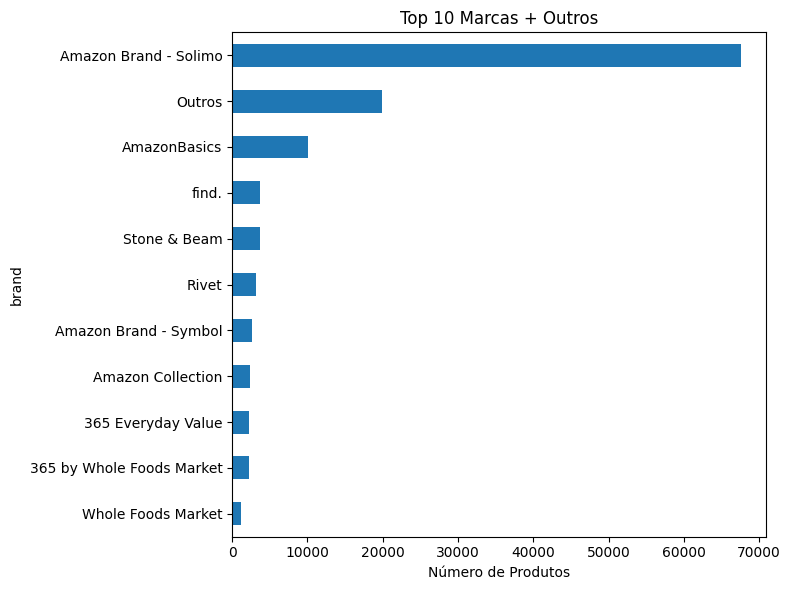

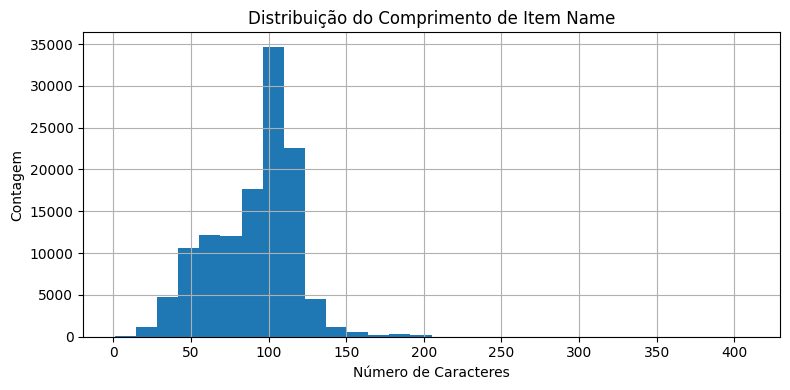

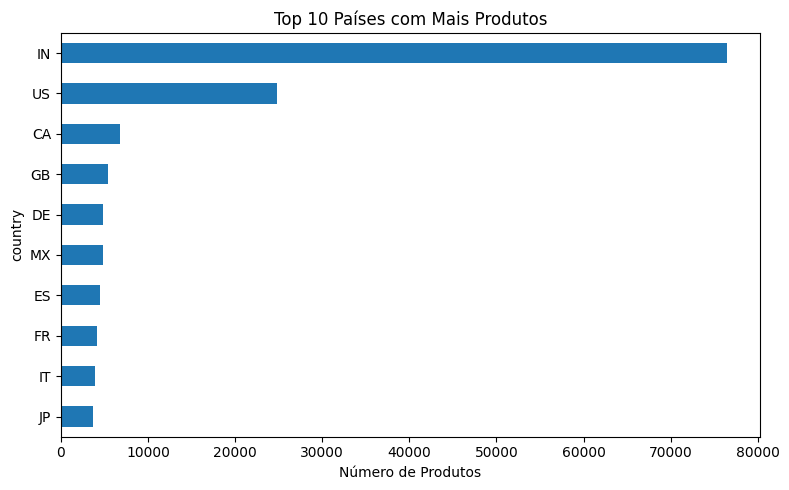

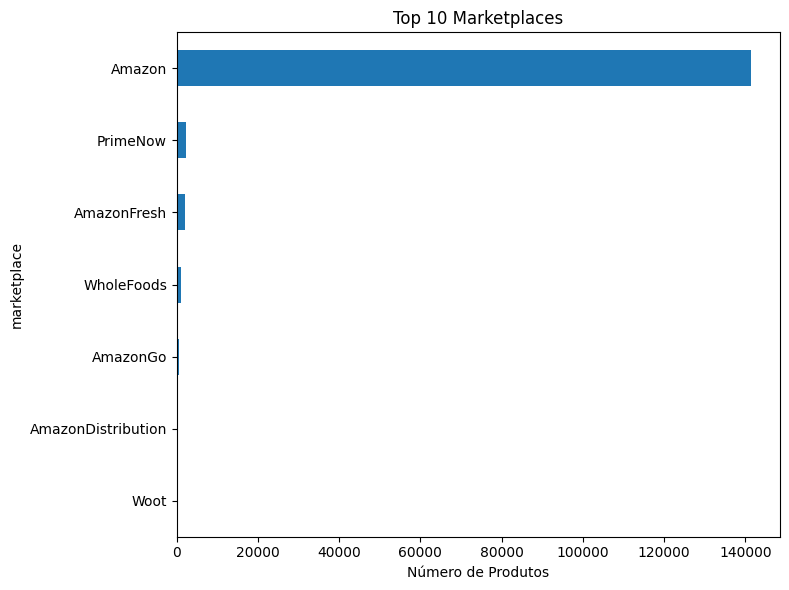

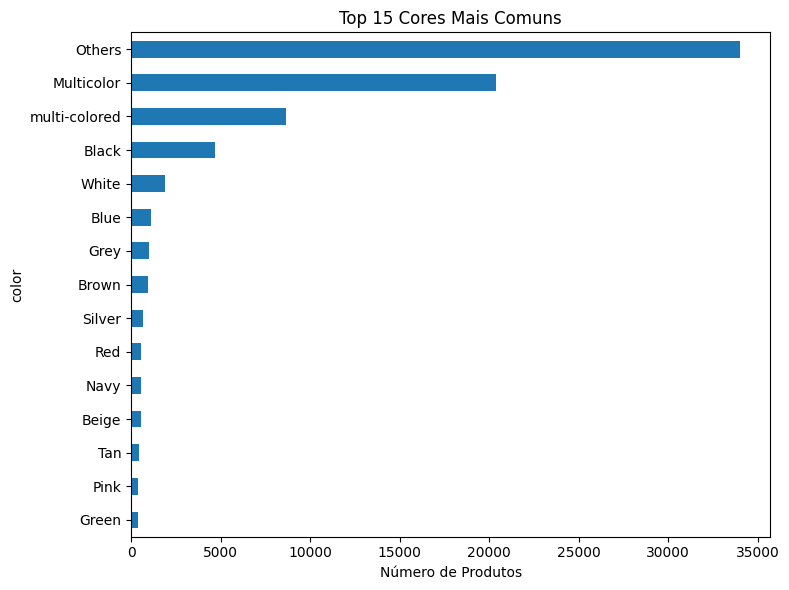

In [21]:
# 1.1 Distribuição de marcas
counts = df["brand"].value_counts()

# 1.2 Pega top-10 e agrupa o resto como “Outros”
top10 = counts.head(10)
others = counts.iloc[10:].sum()
top10["Outros"] = others

# 1.3 Gera o gráfico horizontal
top10.sort_values().plot.barh(figsize=(8,6))
plt.title("Top 10 Marcas + Outros")
plt.xlabel("Número de Produtos")
plt.tight_layout()
plt.show()

# 2. Comprimento de item_name
df["item_name_length"] = df["item_name"].str.len()
df["item_name_length"].hist(bins=30, figsize=(8,4))
plt.title("Distribuição do Comprimento de Item Name")
plt.xlabel("Número de Caracteres")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()


# 3.1 Contagem de produtos por país
vc_country = df["country"].value_counts()

# 3.2 Top-10 países
vc_country.head(10).sort_values().plot.barh(figsize=(8,5))
plt.title("Top 10 Países com Mais Produtos")
plt.xlabel("Número de Produtos")
plt.tight_layout()
plt.show()

# 4 Top-10 marketplaces
df["marketplace"].value_counts().head(10).sort_values().plot.barh(figsize=(8,6))
plt.title("Top 10 Marketplaces")
plt.xlabel("Número de Produtos")
plt.tight_layout()
plt.show()

# 5 Top-15 cores (horizontal pra facilitar leitura)
df["color"].value_counts().head(15).sort_values().plot.barh(figsize=(8,6))
plt.title("Top 15 Cores Mais Comuns")
plt.xlabel("Número de Produtos")
plt.tight_layout()
plt.show()

# Matriz de missingness

Colunas como `item_id`, `marketplace`, `country`, `domain_name` e `product_type` estão praticamente 100 % preenchidas (nenhuma ou pouquíssima letra branca).

Já `bullet_point`, `item_keywords`, `material`, `brand`, `color`, `item_name` e especialmente `model_name` têm faixas brancas bem largas, mostrando que grande parte dessas colunas está vazia.

O padrão das linhas brancas parece indicar correlações de ausência (por ex. se toda vez que `model_name` falta, `material` também falta)

Com isso, podemos:
- Podemos pensar se vamos remover colunas com muitos nulos (ex: material ~68 %) ou se preenchemos/imputamos de alguma forma.

- Talvez valha a pena criar uma categoria “unknown” ou simplesmente ignorar aquela feature.

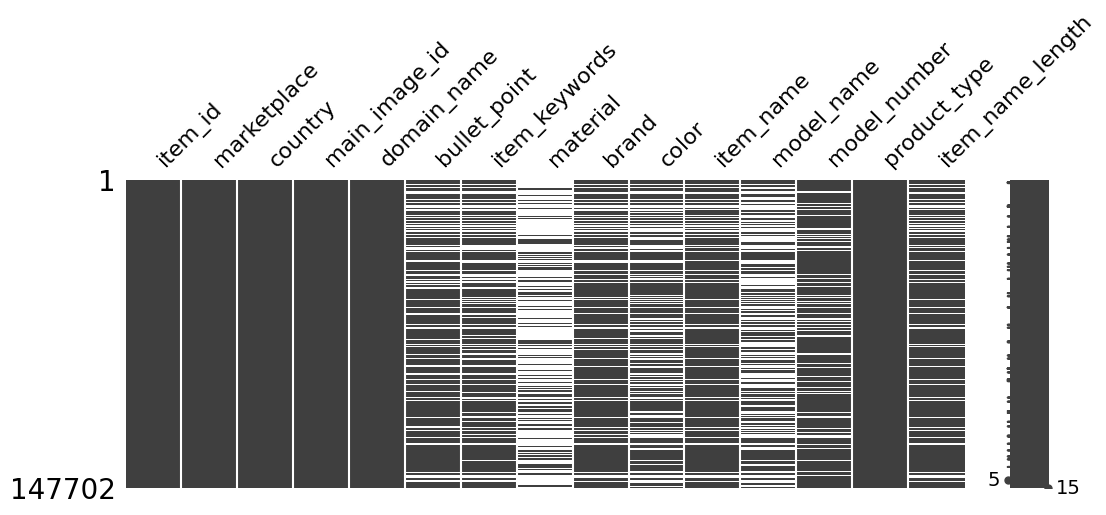

In [19]:
import missingno as msno

msno.matrix(df, figsize=(12,4))
plt.show()

# Comprimento ou contagem de tokens em colunas textuais

Com base nos gráficos abaixo, pensamos em:

Bullet Points (Maioria entre 200 e 500 caracteres):
- Podemos cortar ou filtrar descrições acima de X caracteres.

- Usar uma transformação logarítmica ou limite de percentil (95 %) para visualizar melhor a distribuição.

Item Keywords (Grande massa está concentrada em poucas keywords (1–5)):
- Limpar strings de keywords muito longas (remover duplicatas, aparar excesso).

- Cortar o número de keywords por produto a um máximo razoável (10–15).

- Talvez converter em features binárias (one-hot) só para as keywords mais frequentes.

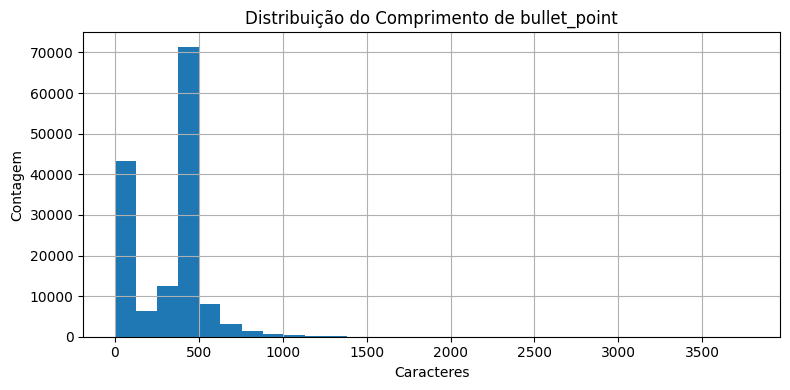

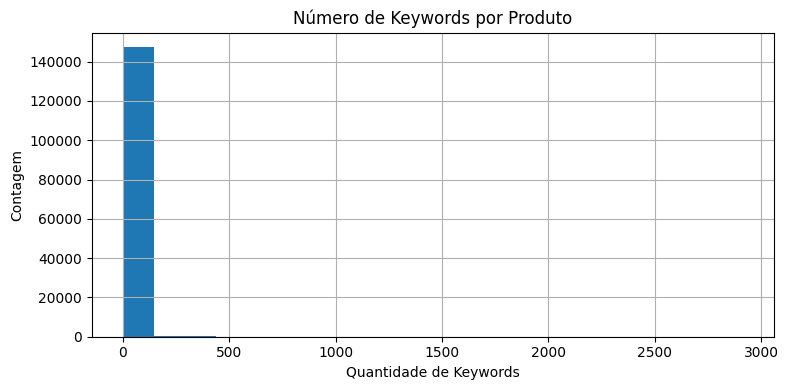

In [20]:
# Bullet Points
# Comprimento em caracteres
df["bp_len"] = df["bullet_point"].str.len().fillna(0)
df["bp_len"].hist(bins=30, figsize=(8,4))
plt.title("Distribuição do Comprimento de bullet_point")
plt.xlabel("Caracteres")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

# Item Keywords
# Quantos keywords por produto?
df["n_keywords"] = df["item_keywords"].fillna("").str.count(",") + 1
df["n_keywords"].hist(bins=20, figsize=(8,4))
plt.title("Número de Keywords por Produto")
plt.xlabel("Quantidade de Keywords")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()